<a href="https://colab.research.google.com/github/SangHeeRho/DataScience/blob/main/unit09_%EC%9A%B0%EB%A6%AC_%EB%8F%99%EB%84%A4_%EC%9D%B8%EA%B5%AC_%EA%B5%AC%EC%A1%B0%EB%A5%BC_%ED%8C%8C%EC%9D%B4_%EC%B0%A8%ED%8A%B8%EB%A1%9C_%EB%82%98%ED%83%80%EB%82%B4%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

한글 꺠짐 방지

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
 
%config InlineBackend.figure_format = 'retina'
 
!apt -qq -y install fonts-nanum
 
import matplotlib.font_manager as fm

fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()

fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.


제주특별자치도의 성별 분포를 항아리 모양 그래프로 표현

인구 구조가 알고 싶은 지역의 이름(읍면동 단위)을 입력해주세요 : 제주특별자치도


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


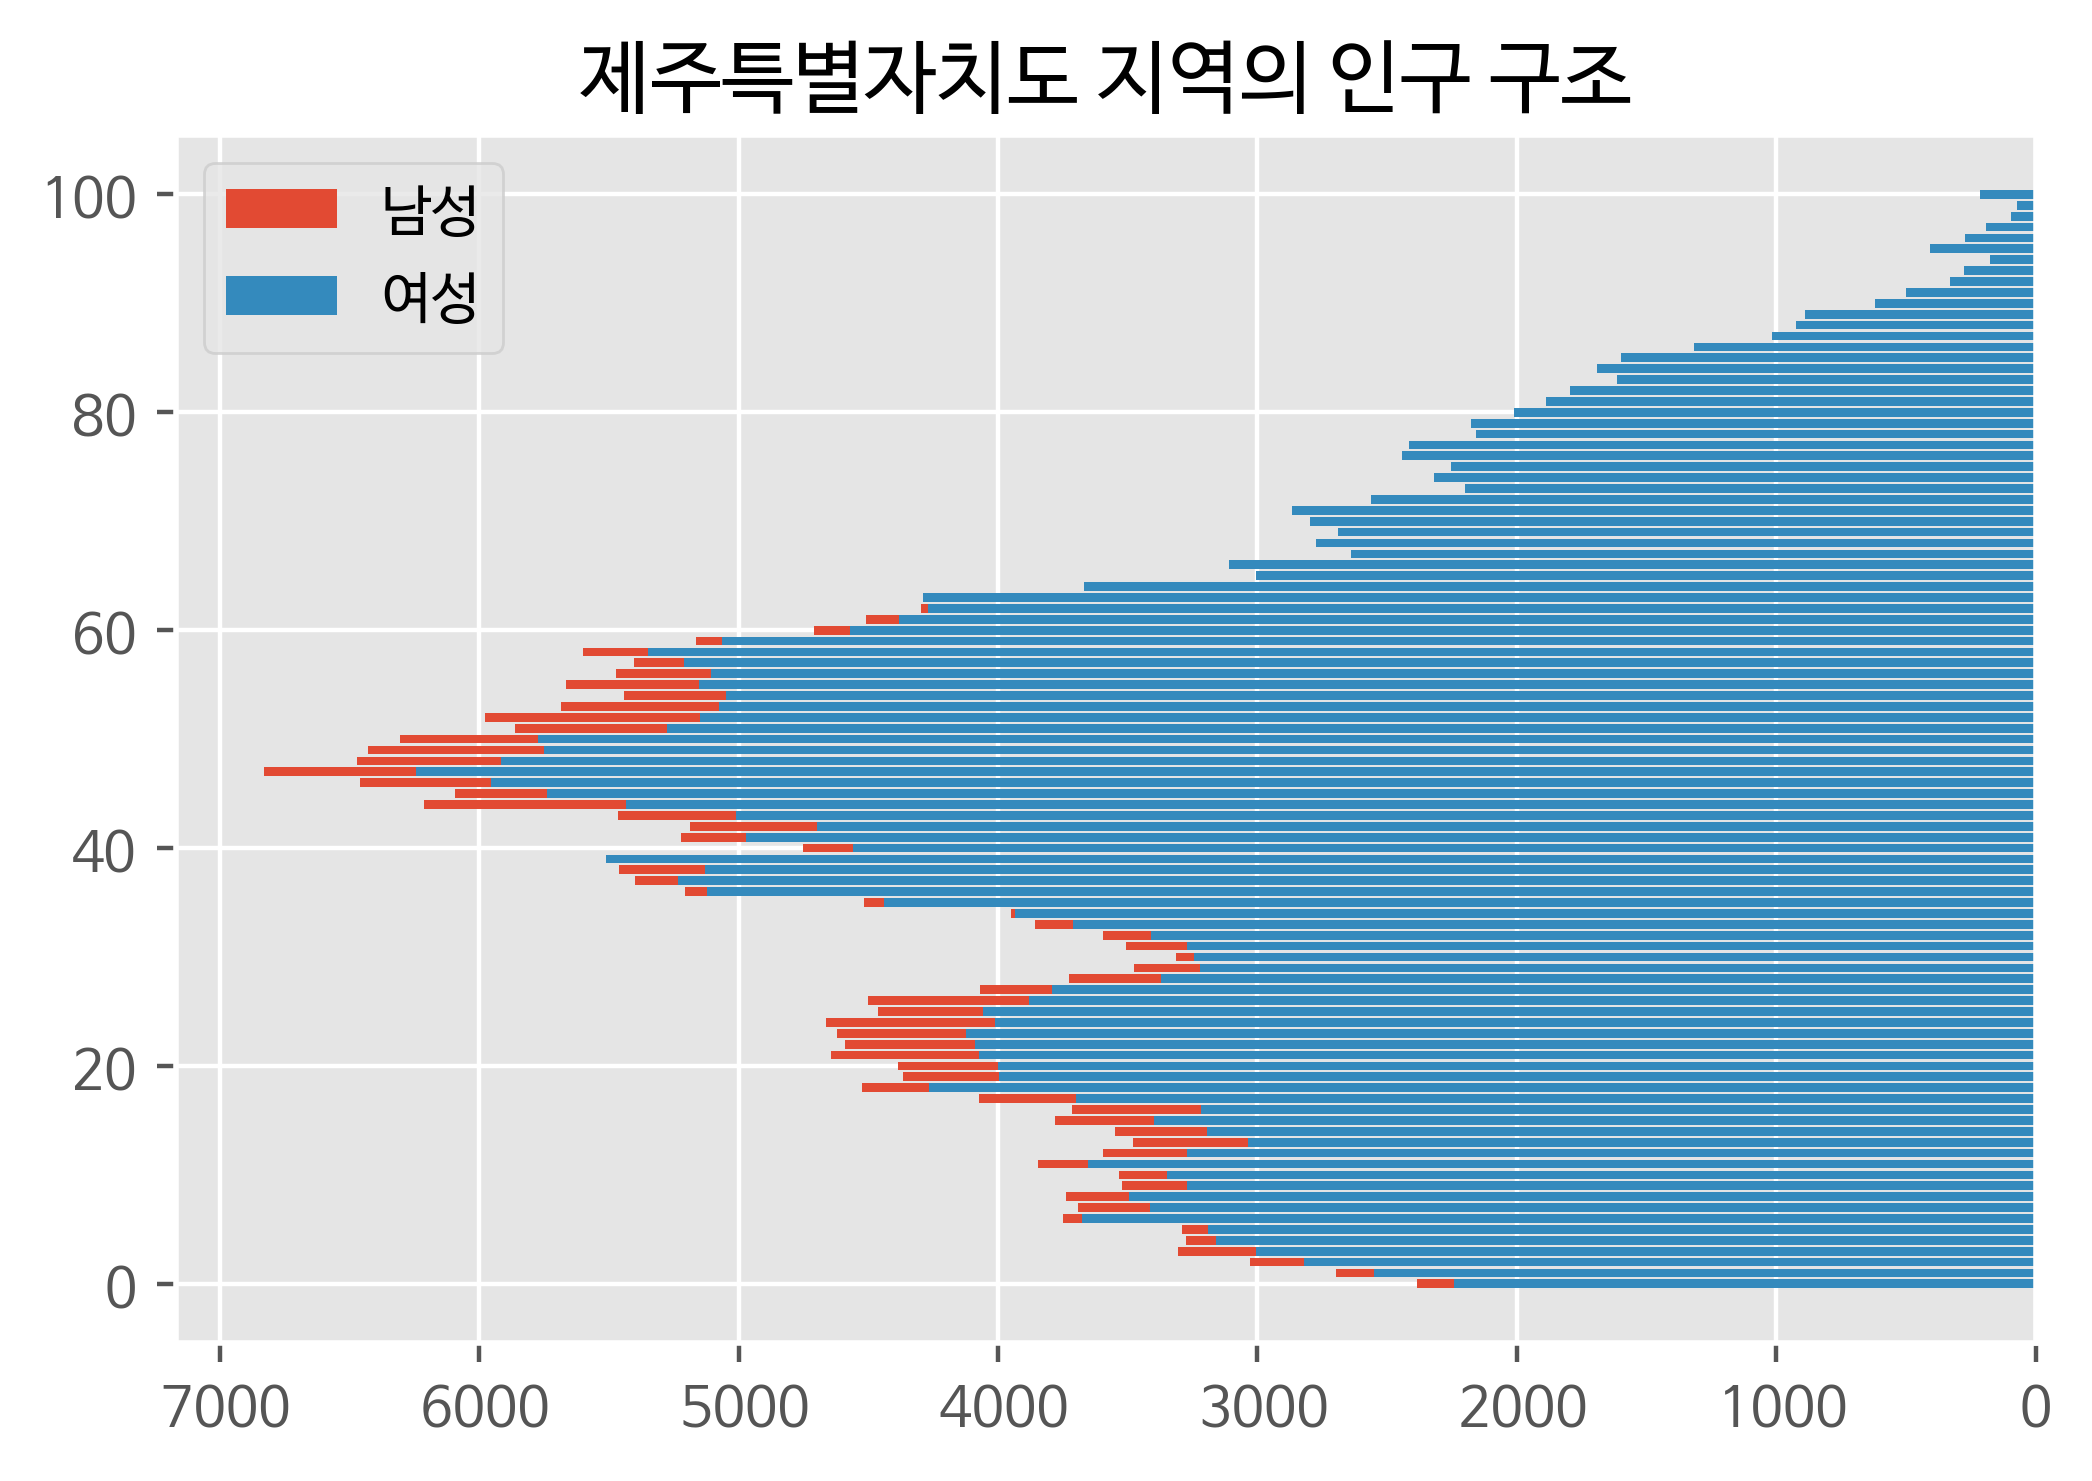

In [ ]:
import csv
f=open('gender.csv',encoding='cp949')
data = csv.reader(f)

m=[]
f=[]

#지역명을 입력받는 변수 선언
name = input("인구 구조가 알고 싶은 지역의 이름(읍면동 단위)을 입력해주세요 : ")

for row in data :
  if name in row[0]:
    for i in row[3:104] :# 남성 데이터 :3 - 103번 데이터 슬라이싱 - 정수 데이터로 변환 - m 리스트에 저장
      m.append(-int(i.replace(',','')))
    for i in row[106:]: # 여성 데이터 :106번 - 끝까지 데이터 슬라이싱 - 정수 데이터로 변환 - f 리스트에 저장
      f.append(-int(i.replace(',','')))
    break

# 인구 구조 시각화
plt.figure(dpi = 200)
plt.style.use('ggplot')
plt.rc('font',family = 'NanumBarunGothic')

plt.title(name +' 지역의 인구 구조') #입력 받은 지역 이름 포함하여, 타이틀 속성 추가
plt.barh(range(101), m, label = '남성')
plt.barh(range(101), f ,label = '여성')
plt.legend()
plt.show()

제주특별자치도 데이터 확인 -> 101개여야 하는데, 4646 -> 46배 큰 값 -> 제주특별자치도 포함된 지역 이름이 총 46건

In [ ]:
print(len(m), len(f))

101 101


항아리 모양의 그래프는 연령대별 인구 차이 확인 가능 <br>
 but 어떤 성별이 더 많은지에 대한 정보 한눈에 파악하기 어려움 -> 파이차트 Pie

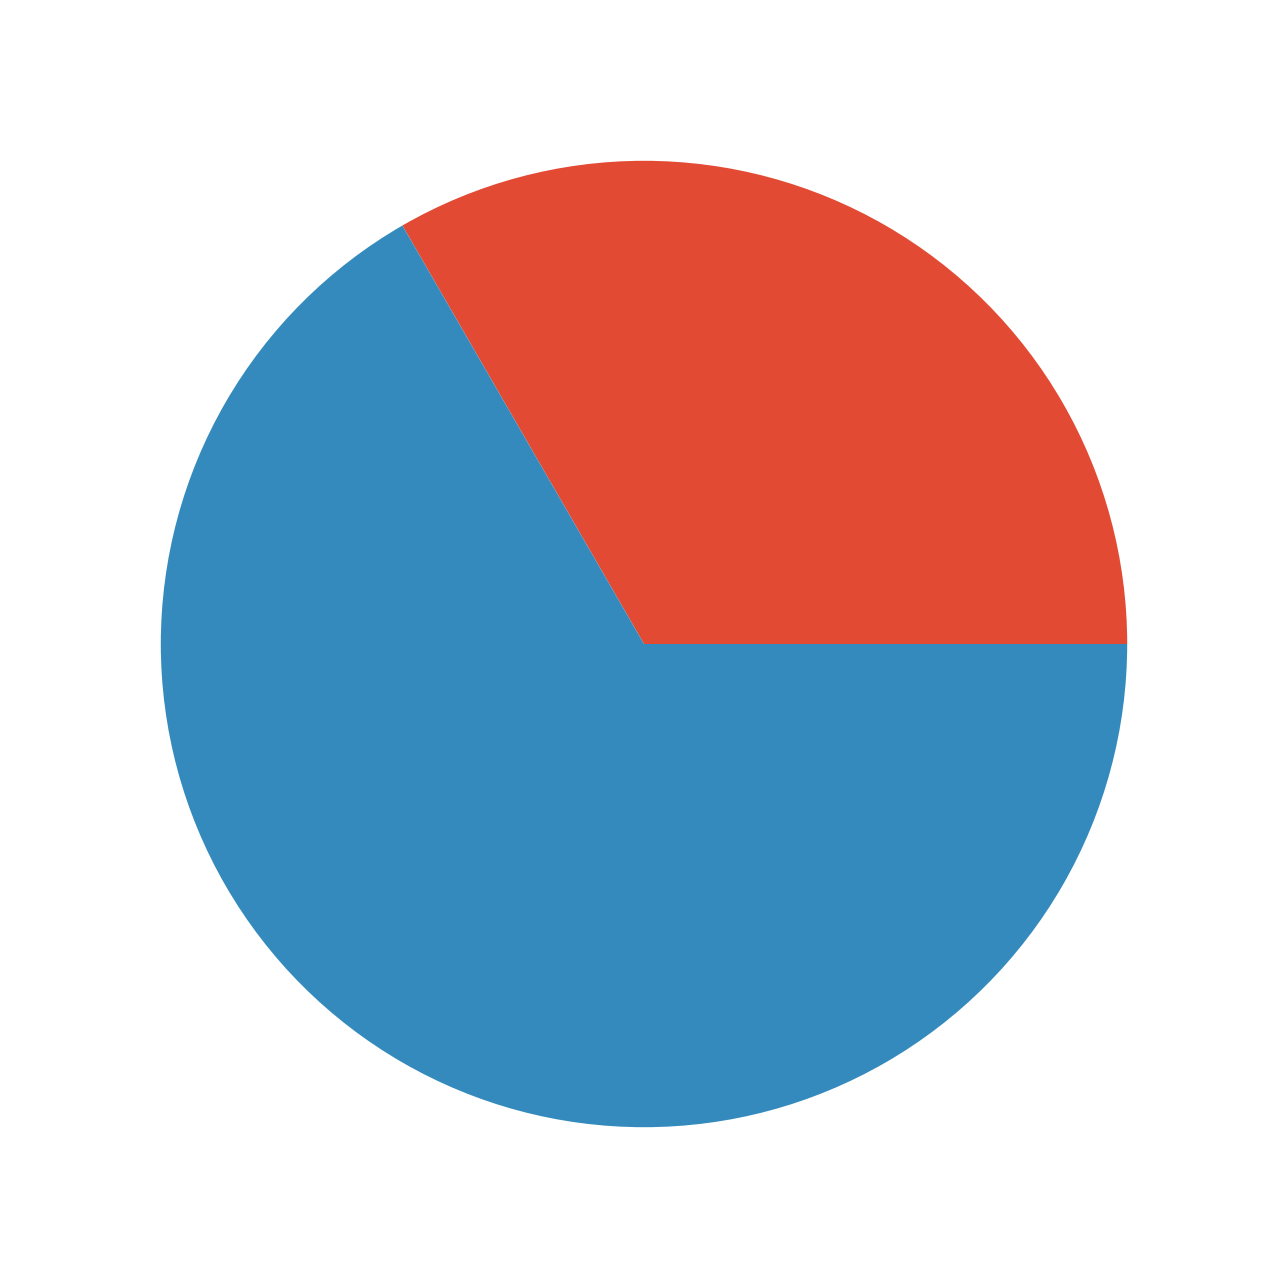

In [ ]:
import matplotlib.pyplot as plt

plt.figure(dpi=200)

plt.pie([10,20])# pie(x) x가 가지고 있는 값을 비율로 표시
plt.show()

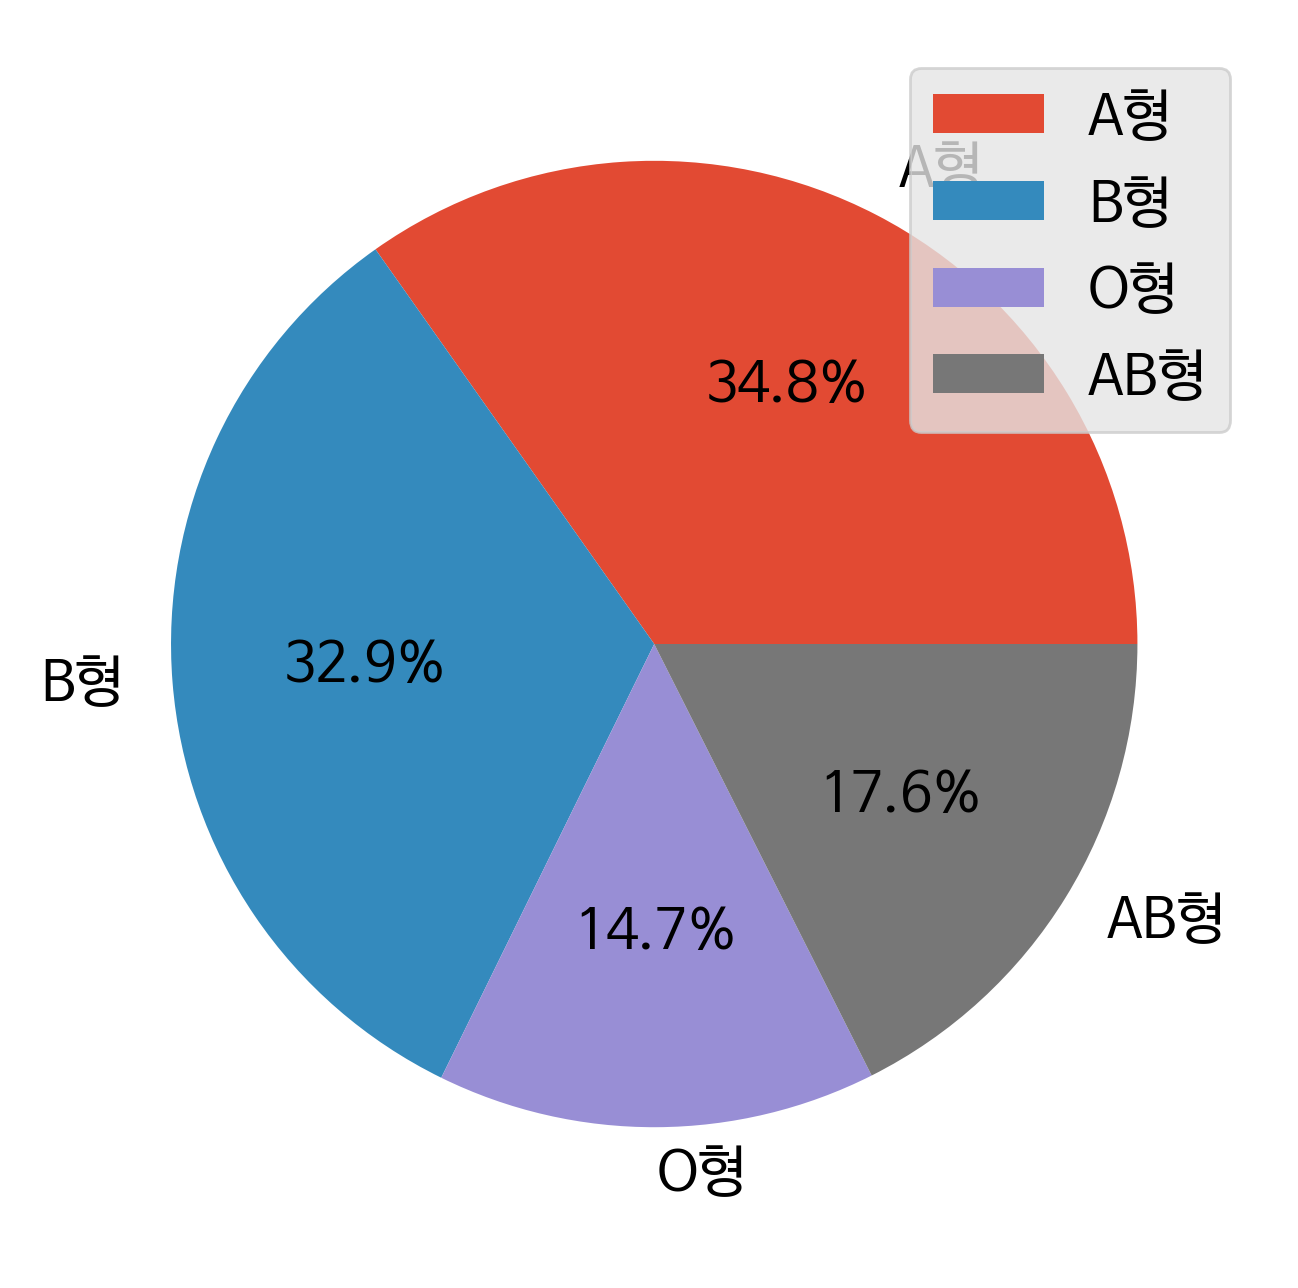

In [ ]:
import matplotlib.pyplot as plt

plt.figure(dpi=200)

size = [2441,2312,1031,1233]
label = ['A형','B형','O형','AB형']
# plt.axis('equal')
plt.pie(size, labels=label, autopct='%.1f%%') # 혈액형의 비율을 임의로 작성
plt.legend()
plt.show()

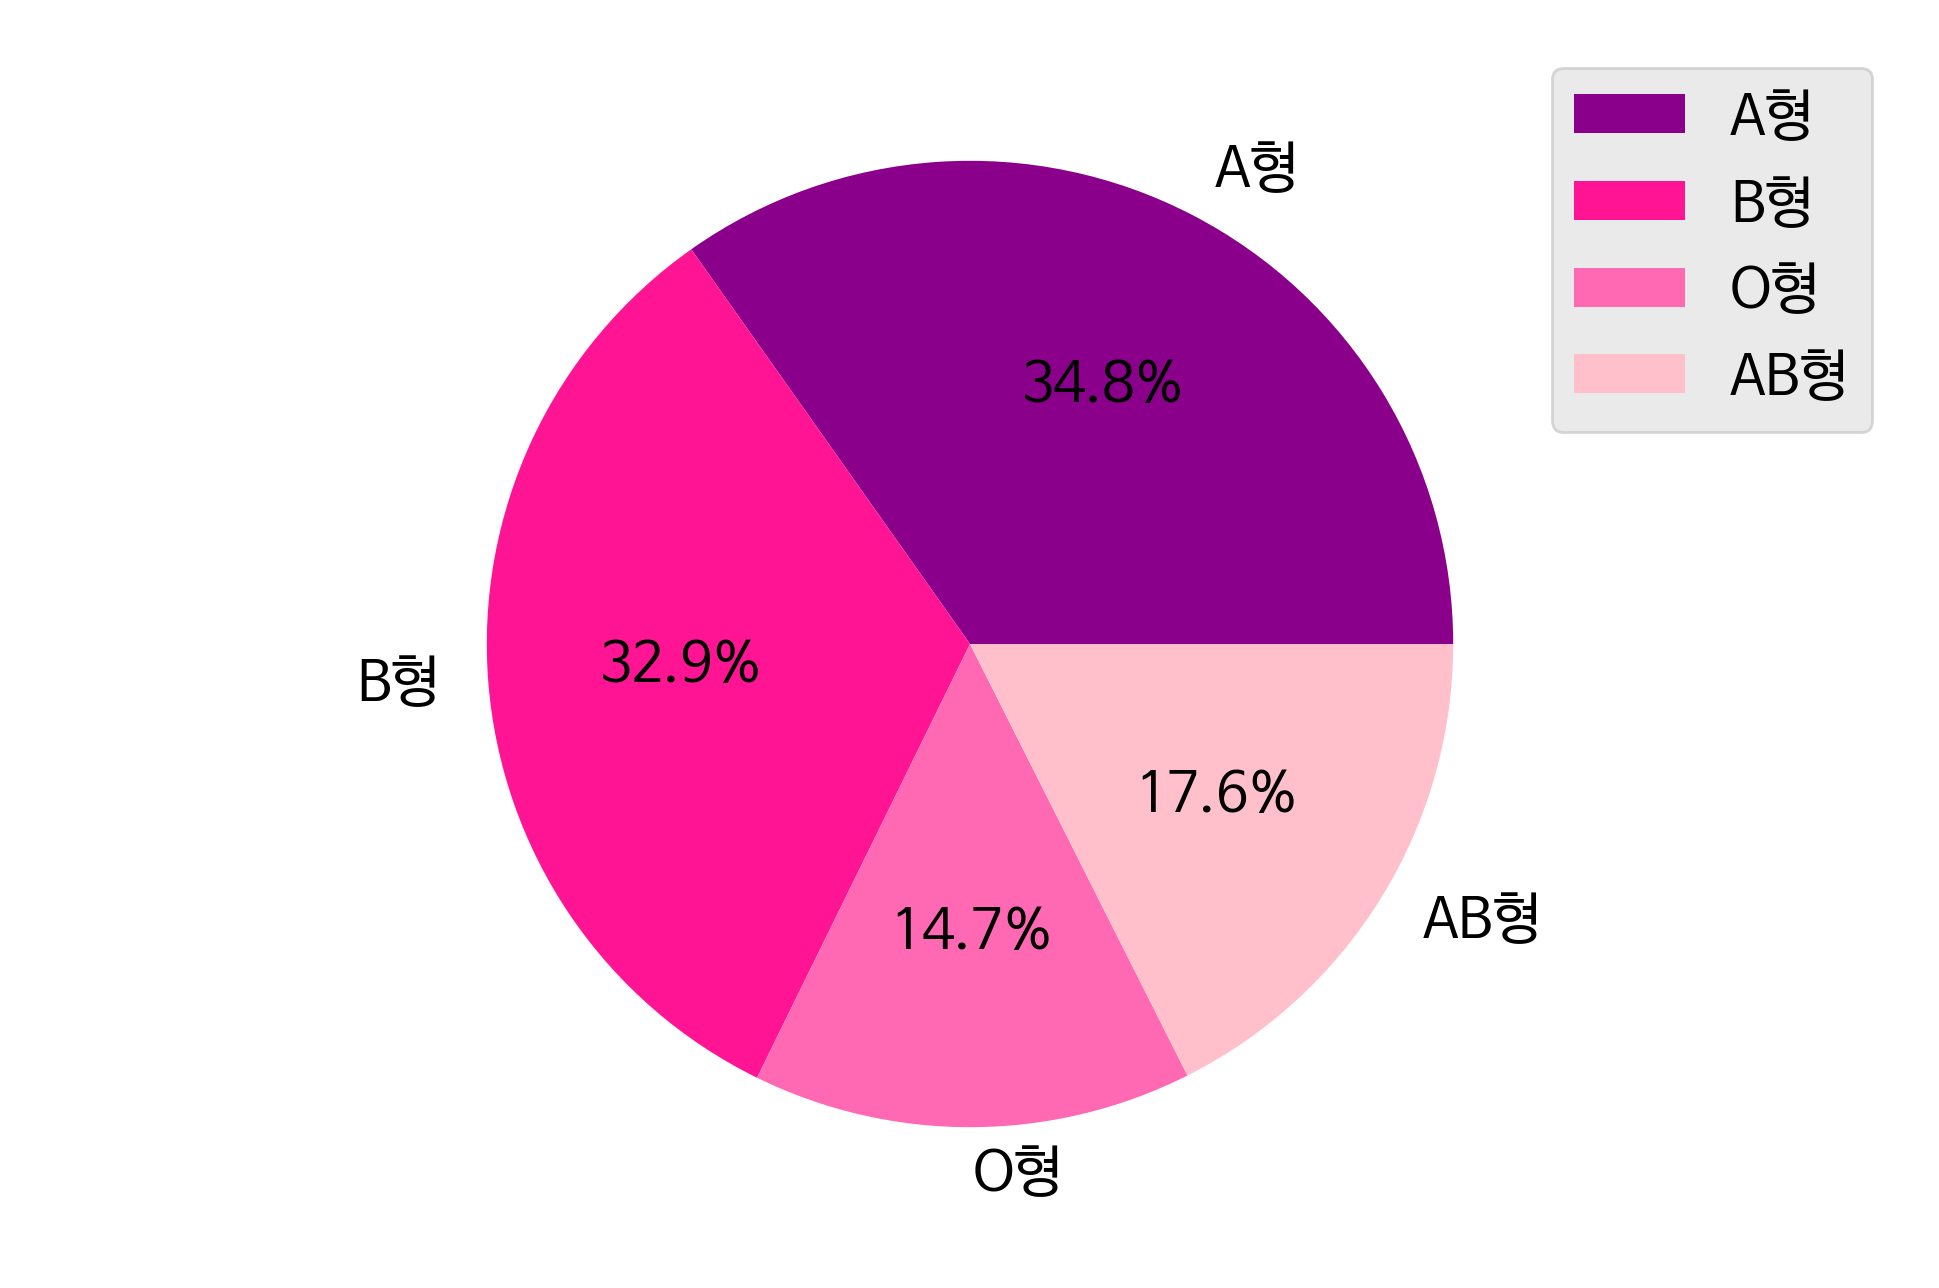

In [ ]:
import matplotlib.pyplot as plt

plt.figure(dpi=200)

size = [2441,2312,1031,1233]
label = ['A형','B형','O형','AB형']
color = ['darkmagenta', 'deeppink', 'hotpink', 'pink']

plt.axis('equal')
plt.pie(size, labels=label, autopct='%.1f%%', colors=color) # 혈액형의 비율을 임의로 작성
plt.legend()
plt.show()

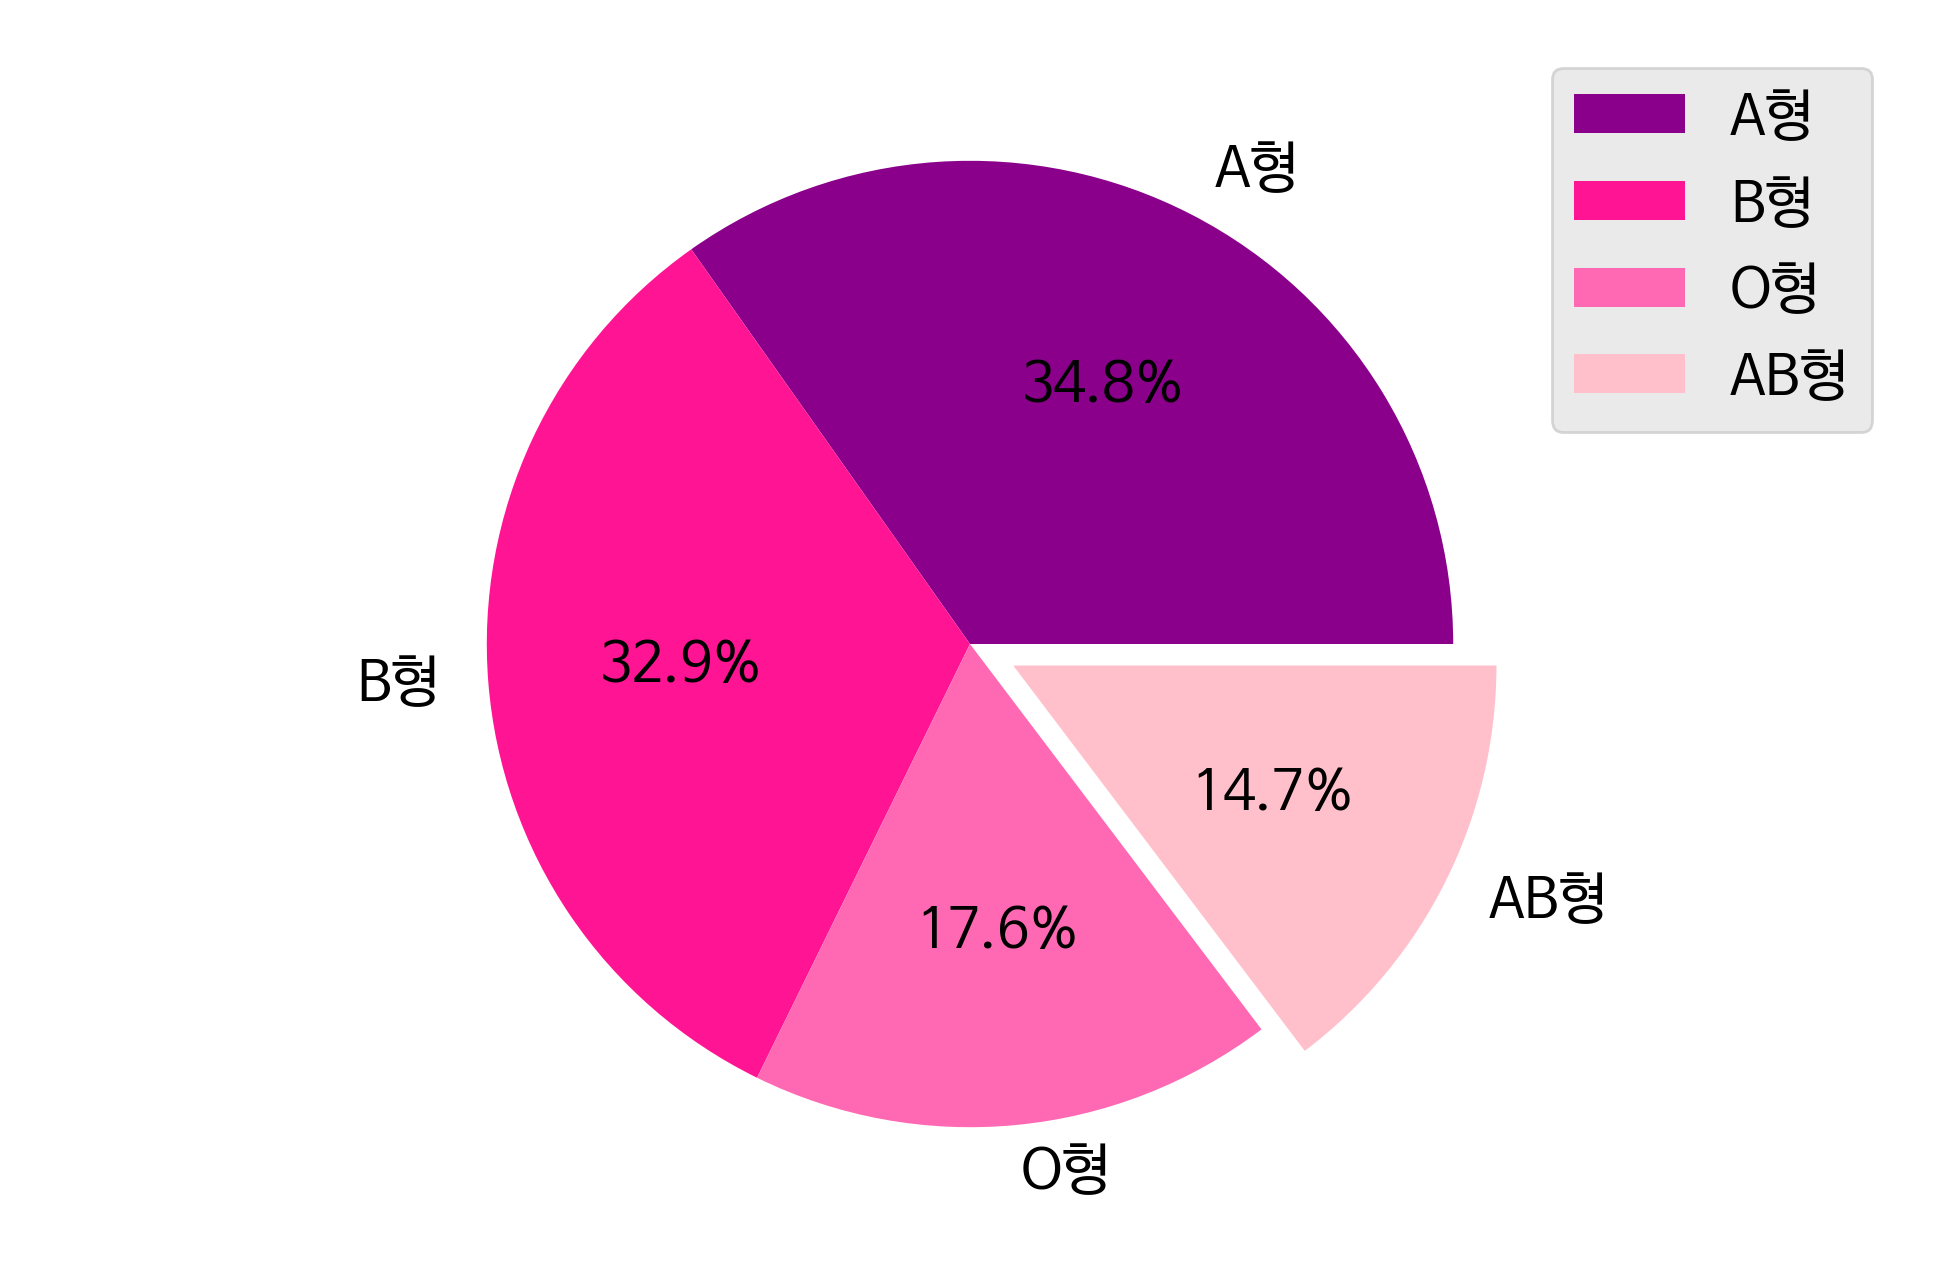

In [ ]:
#파이 조각을 표현
import matplotlib.pyplot as plt

plt.figure(dpi=200)

size = [2441,2312,1233,1031]
label = ['A형','B형','O형','AB형']
color = ['darkmagenta', 'deeppink', 'hotpink', 'pink']

plt.axis('equal')
plt.pie(size, labels=label, autopct='%.1f%%', explode=(0,0,0,0.1), colors=color) # 혈액형의 비율을 임의로 작성
plt.legend()
plt.show()

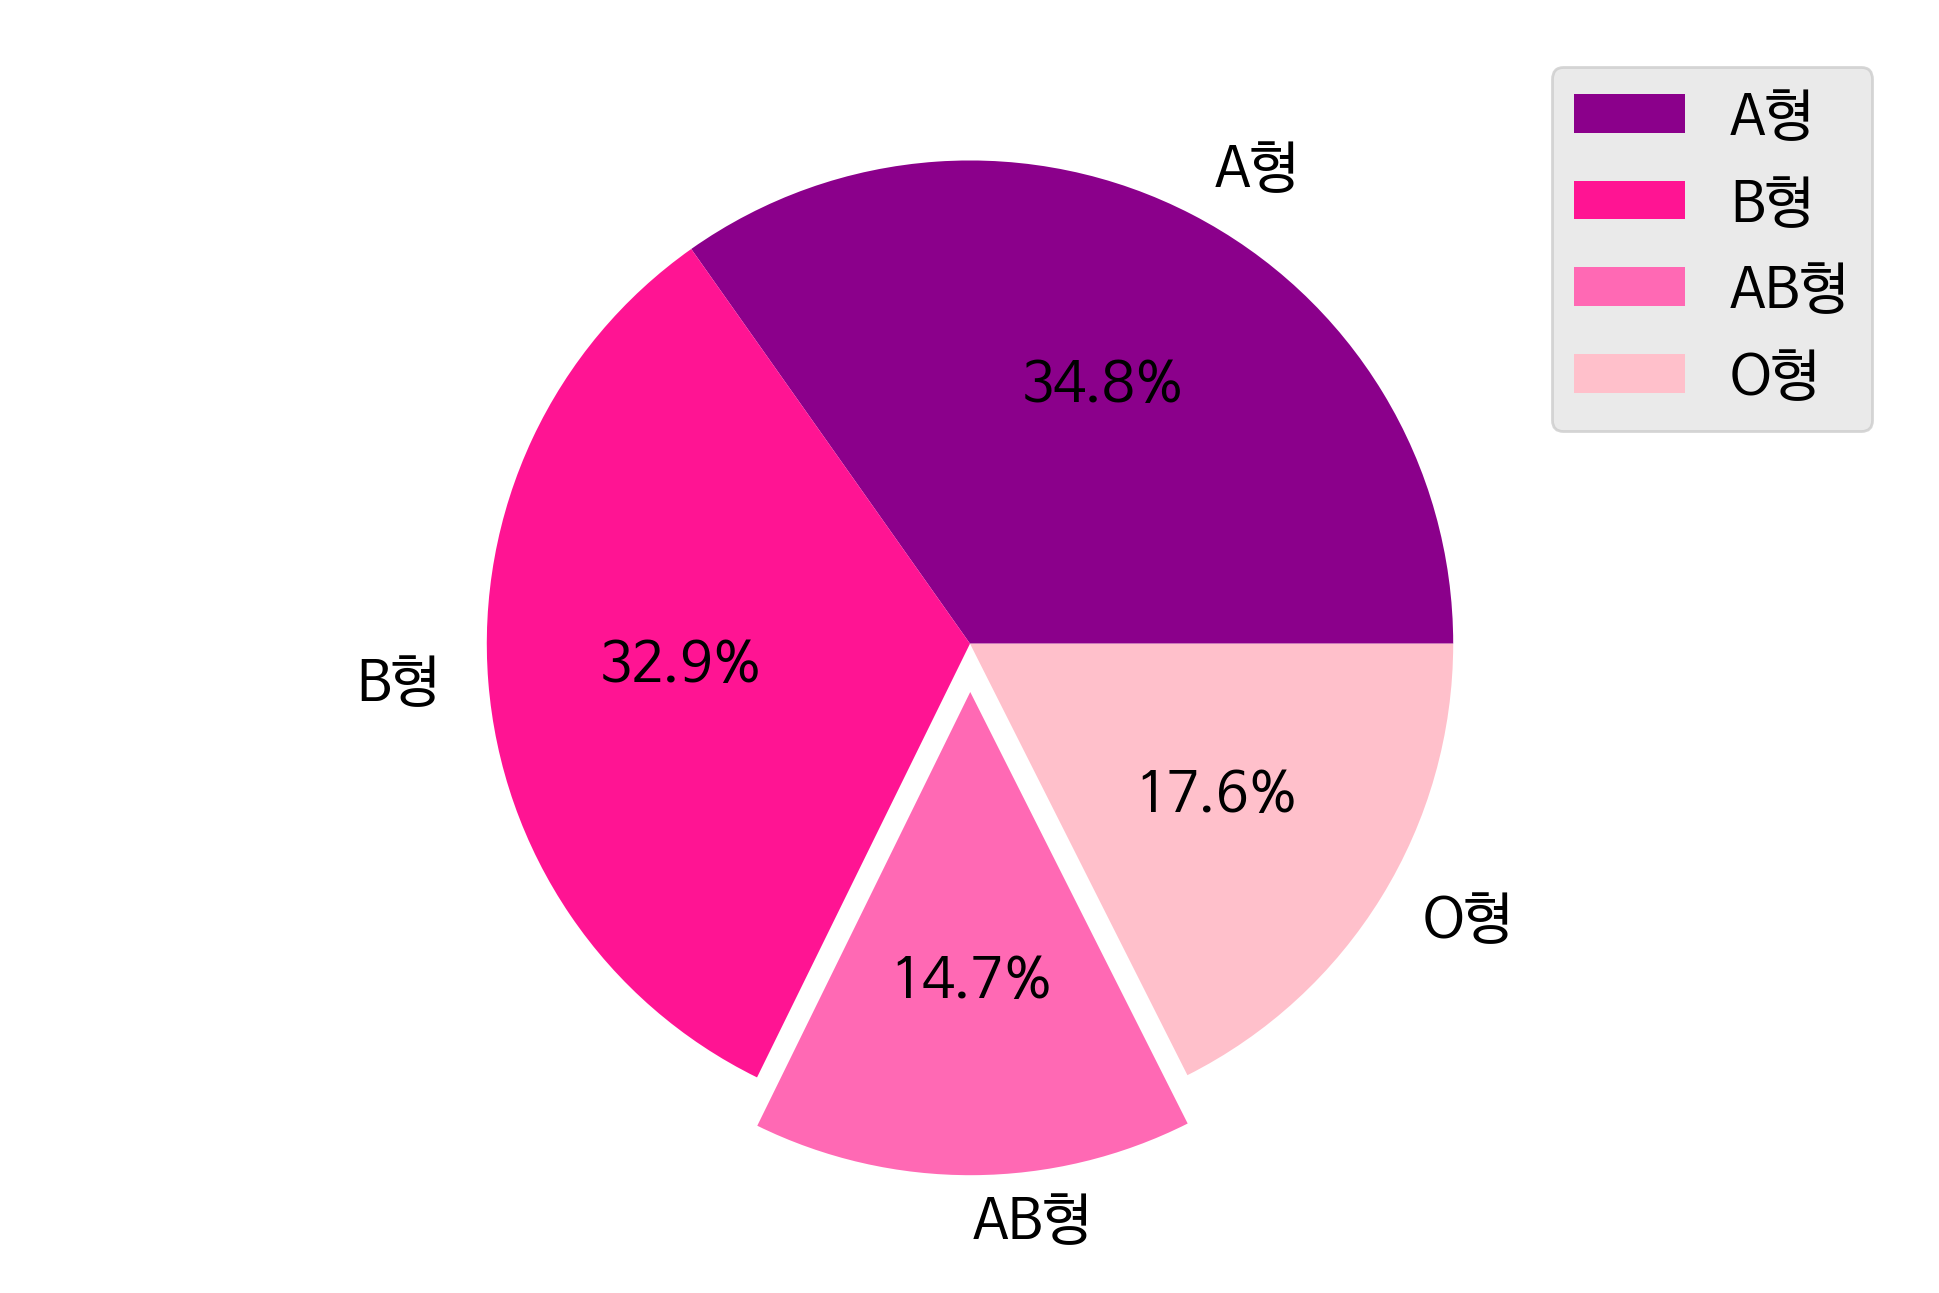

In [ ]:
#파이 조각을 표현 -> 하단에 내가 표현하고 싶은 건 표기 안함
import matplotlib.pyplot as plt

plt.figure(dpi=200)

size = [2441,2312,1031,1233]
label = ['A형','B형','AB형','O형']
color = ['darkmagenta', 'deeppink', 'hotpink', 'pink']

plt.axis('equal')
plt.pie(size, labels=label, autopct='%.1f%%', explode=(0,0,0.1,0), colors=color,shadow = True) # 혈액형의 비율을 임의로 작성
plt.legend()
plt.show()

제주도의 성별 인구 비율 표현하기

찾고 싶은 지역의 이름을 알려주세요 : 광명시
[161524, 164901]


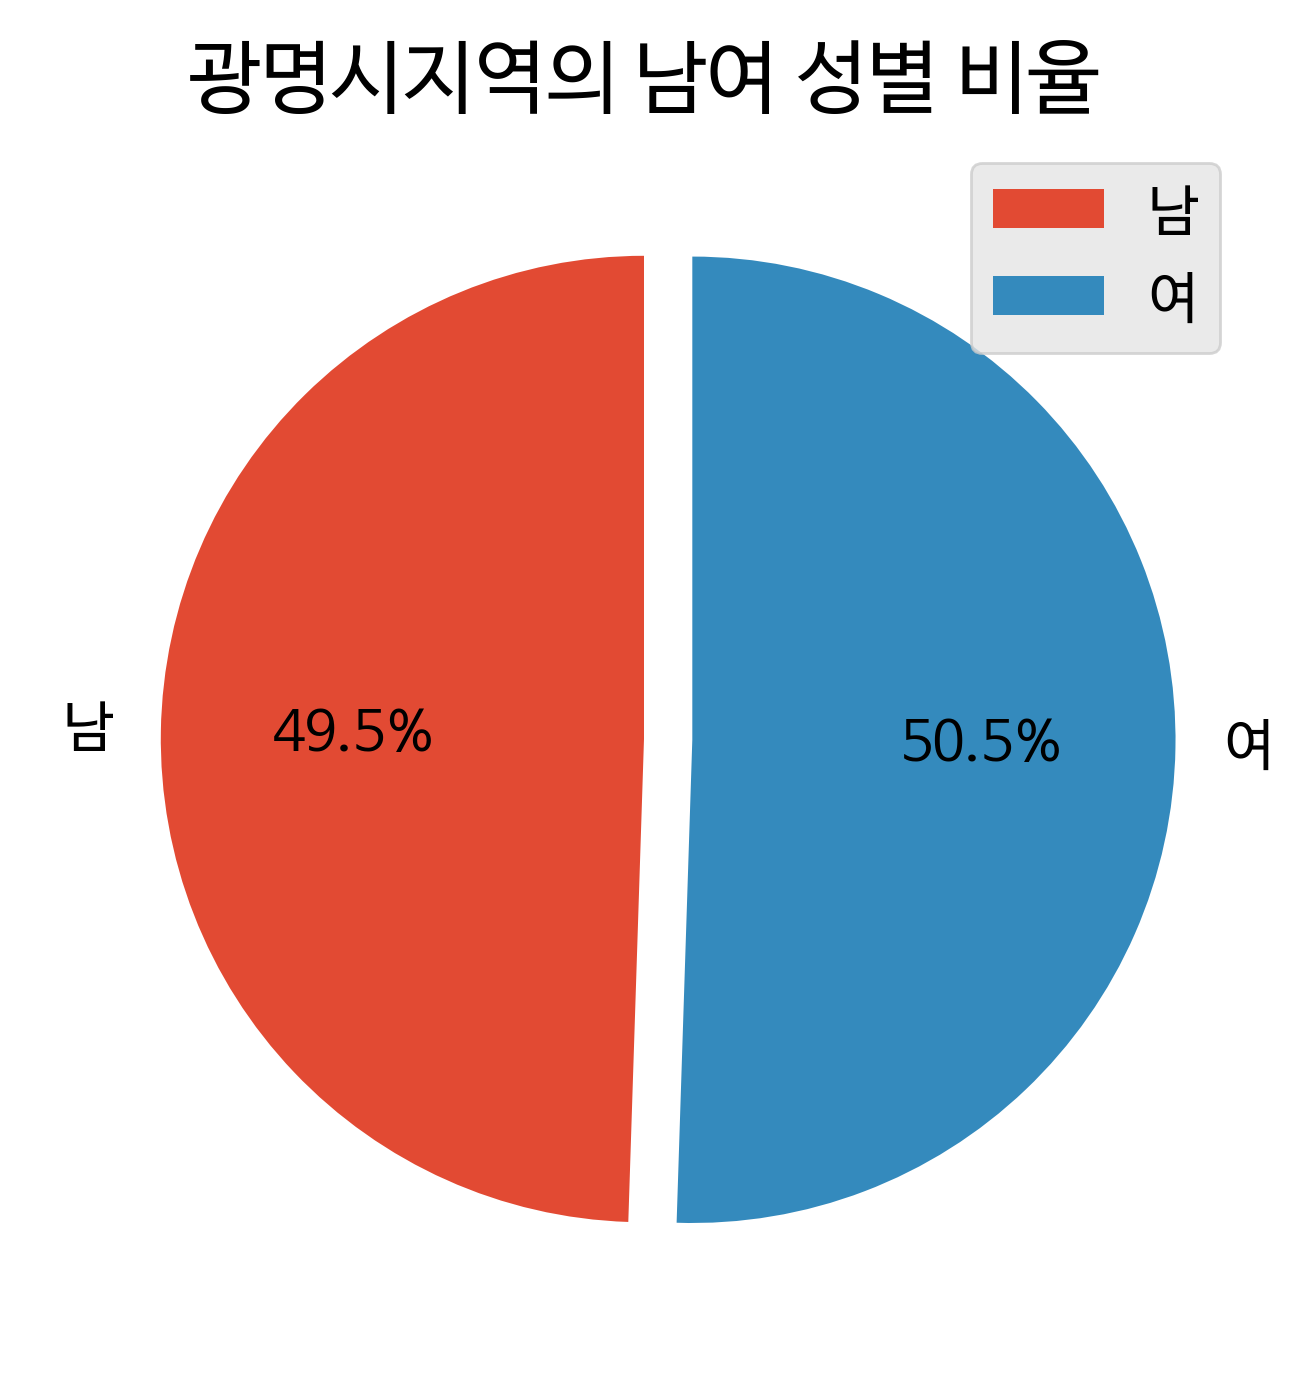

In [ ]:
import csv
f=open('gender.csv',encoding='cp949')
data = csv.reader(f)

m=[]
f=[]
size=[]

#지역명을 입력받는 변수 선언
name = input("찾고 싶은 지역의 이름을 알려주세요 : ")

for row in data :
  if name in row[0]:
    m=0 # 남성 인구수 합계 변수
    f=0 # 여성 인구수 합계 변수
    for i in range(101):
      m += int(row[3+i].replace(',','')) # m = m + int(row[3+i].replace(',',''))
      f += int(row[106+i].replace(',','')) # f = f + int(row[3+i].replace(',',''))
    break

size.append(m)
size.append(f)

print(size)

#파이차트 시각화
plt.figure(dpi=200)
color = ['crimson', 'darkcyan']
label = ['남','여']
# plt.axis('equal')
plt.pie(size,labels=label, autopct = '%.1f%%', explode=(0,0.1), startangle=90,) # 혈액형의 비율을 임의로 작성
plt.legend()
plt.title(name + '지역의 남여 성별 비율')
plt.show()